In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
print(f"Old working dir {os.getcwd()}")
os.chdir('../../')
print(f"New working dir {os.getcwd()}")

Old working dir /home/alex/repos/conditional_quantile_function/notebooks/conformal
New working dir /home/alex/repos/conditional_quantile_function


In [4]:
from pathlib import Path

import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
results_dir = Path('./conformal_results/')

In [9]:
from conformal.real_datasets.process_raw import datasets

In [24]:
dataframes = []
seeds = range(10)
for seed in seeds:
    for dataset_name in datasets:
        fn = results_dir / dataset_name / str(seed) / f"metrics.feather"
        if fn.is_file():
            dataframes.append(pd.read_feather(fn))
        else:
            print(f"Error: dataset {dataset_name}, seed {seed} not found.")
df = pd.concat(dataframes)
df.head()

Error: dataset sgemm, seed 0 not found.
Error: dataset bio, seed 0 not found.
Error: dataset scm20d, seed 1 not found.
Error: dataset sgemm, seed 1 not found.
Error: dataset bio, seed 1 not found.
Error: dataset blog, seed 1 not found.
Error: dataset rf1, seed 2 not found.
Error: dataset rf2, seed 2 not found.
Error: dataset scm1d, seed 2 not found.
Error: dataset scm20d, seed 2 not found.
Error: dataset sgemm, seed 2 not found.
Error: dataset bio, seed 2 not found.
Error: dataset blog, seed 2 not found.
Error: dataset rf1, seed 3 not found.
Error: dataset rf2, seed 3 not found.
Error: dataset scm1d, seed 3 not found.
Error: dataset scm20d, seed 3 not found.
Error: dataset sgemm, seed 3 not found.
Error: dataset bio, seed 3 not found.
Error: dataset blog, seed 3 not found.
Error: dataset rf1, seed 4 not found.
Error: dataset rf2, seed 4 not found.
Error: dataset scm1d, seed 4 not found.
Error: dataset scm20d, seed 4 not found.
Error: dataset sgemm, seed 4 not found.
Error: dataset bio,

,dataset_name,seed,method_name,method_name_mathtext,score_name,base_model_name,alpha,marginal_coverage,worst_slab_coverage,volume
0,rf1,0,PB,$\mathcal{C}^{\mathrm{pb}}$,MK Rank,CVQRegressor,0.1,0.8855,0.531915,4.901957
1,rf1,0,RPB,$\mathcal{C}^{\mathrm{rpb}}$,MK Quantile,CVQRegressor,0.1,0.9005,0.790055,137673.640956
2,rf1,0,HPD,$\mathcal{C}^{\mathrm{HPD}}$,Log Density,CVQRegressor,0.1,0.8960,0.697917,382965.378687
3,rf1,0,OT-CP-Global,$\mathrm{OT}-\mathrm{CP}$,Signed Error,RandomForest,0.1,0.8865,0.811688,61536.102537
4,rf1,0,PB,$\mathcal{C}^{\mathrm{pb}}$,MK Rank,CVQRegressor,0.2,0.7780,0.279412,1.014858


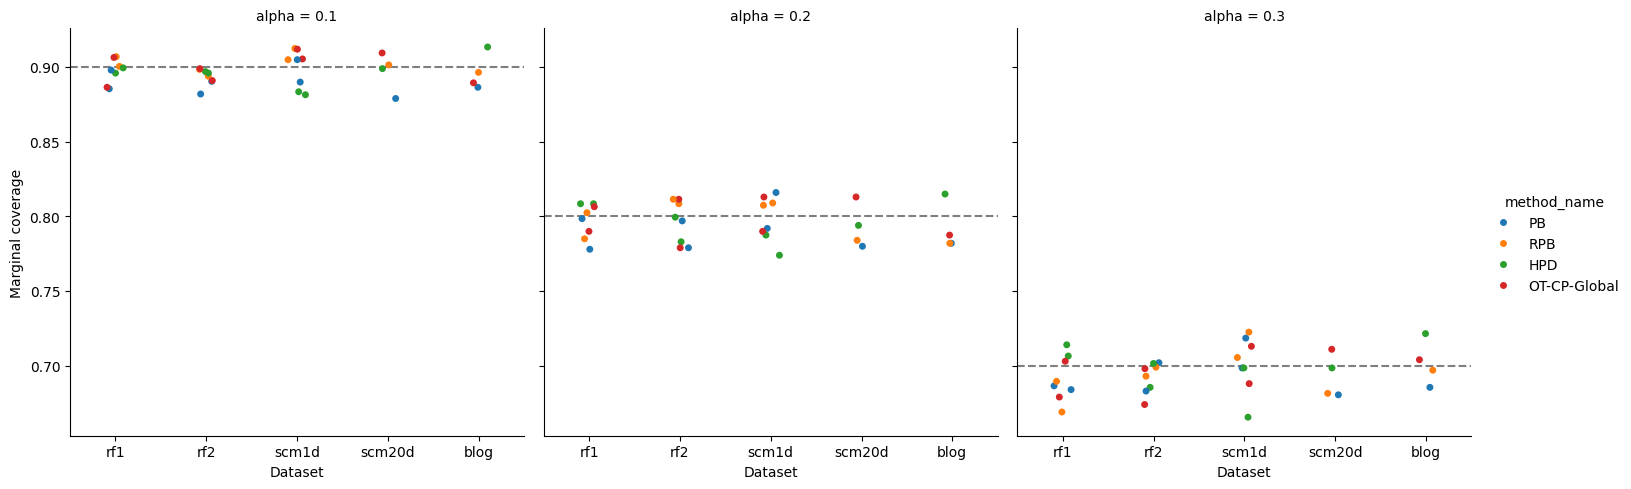

In [25]:
g_cov = sns.catplot(
    data=df, x="dataset_name", y="marginal_coverage", col="alpha", hue="method_name"
)
g_cov.set_axis_labels("Dataset", "Marginal coverage")
for alpha, ax in g_cov.axes_dict.items():
    ax.axhline(1 - alpha, ls="--", c="k", alpha=0.5)

In [26]:
g_cov.axes_dict

{np.float64(0.1): <Axes: title={'center': 'alpha = 0.1'}, xlabel='Dataset', ylabel='Marginal coverage'>,
 np.float64(0.2): <Axes: title={'center': 'alpha = 0.2'}, xlabel='Dataset'>,
 np.float64(0.3): <Axes: title={'center': 'alpha = 0.3'}, xlabel='Dataset'>}

In [31]:
df

,dataset_name,seed,method_name,method_name_mathtext,score_name,base_model_name,alpha,marginal_coverage,worst_slab_coverage,volume
0,rf1,0,PB,$\mathcal{C}^{\mathrm{pb}}$,MK Rank,CVQRegressor,0.1,0.8855,0.531915,4.901957e+00
1,rf1,0,RPB,$\mathcal{C}^{\mathrm{rpb}}$,MK Quantile,CVQRegressor,0.1,0.9005,0.790055,1.376736e+05
2,rf1,0,HPD,$\mathcal{C}^{\mathrm{HPD}}$,Log Density,CVQRegressor,0.1,0.8960,0.697917,3.829654e+05
3,rf1,0,OT-CP-Global,$\mathrm{OT}-\mathrm{CP}$,Signed Error,RandomForest,0.1,0.8865,0.811688,6.153610e+04
4,rf1,0,PB,$\mathcal{C}^{\mathrm{pb}}$,MK Rank,CVQRegressor,0.2,0.7780,0.279412,1.014858e+00
...,...,...,...,...,...,...,...,...,...,...
7,scm1d,1,OT-CP-Global,$\mathrm{OT}-\mathrm{CP}$,Signed Error,RandomForest,0.2,0.8130,0.471545,1.642671e+12
8,scm1d,1,PB,$\mathcal{C}^{\mathrm{pb}}$,MK Rank,CVQRegressor,0.3,0.7185,0.542636,4.677218e+07
9,scm1d,1,RPB,$\mathcal{C}^{\mathrm{rpb}}$,MK Quantile,CVQRegressor,0.3,0.7225,0.574627,5.716165e+11
10,scm1d,1,HPD,$\mathcal{C}^{\mathrm{HPD}}$,Log Density,CVQRegressor,0.3,0.6655,0.263158,1.948841e+13


In [34]:
metrics_columns = ["marginal_coverage", "worst_slab_coverage", "volume"]
id_vars = list(df.columns.difference(metrics_columns))
df_melted = pd.melt(df, id_vars=id_vars, value_vars=metrics_columns, var_name="metric", value_name="value")

In [35]:
len(df_melted)

288

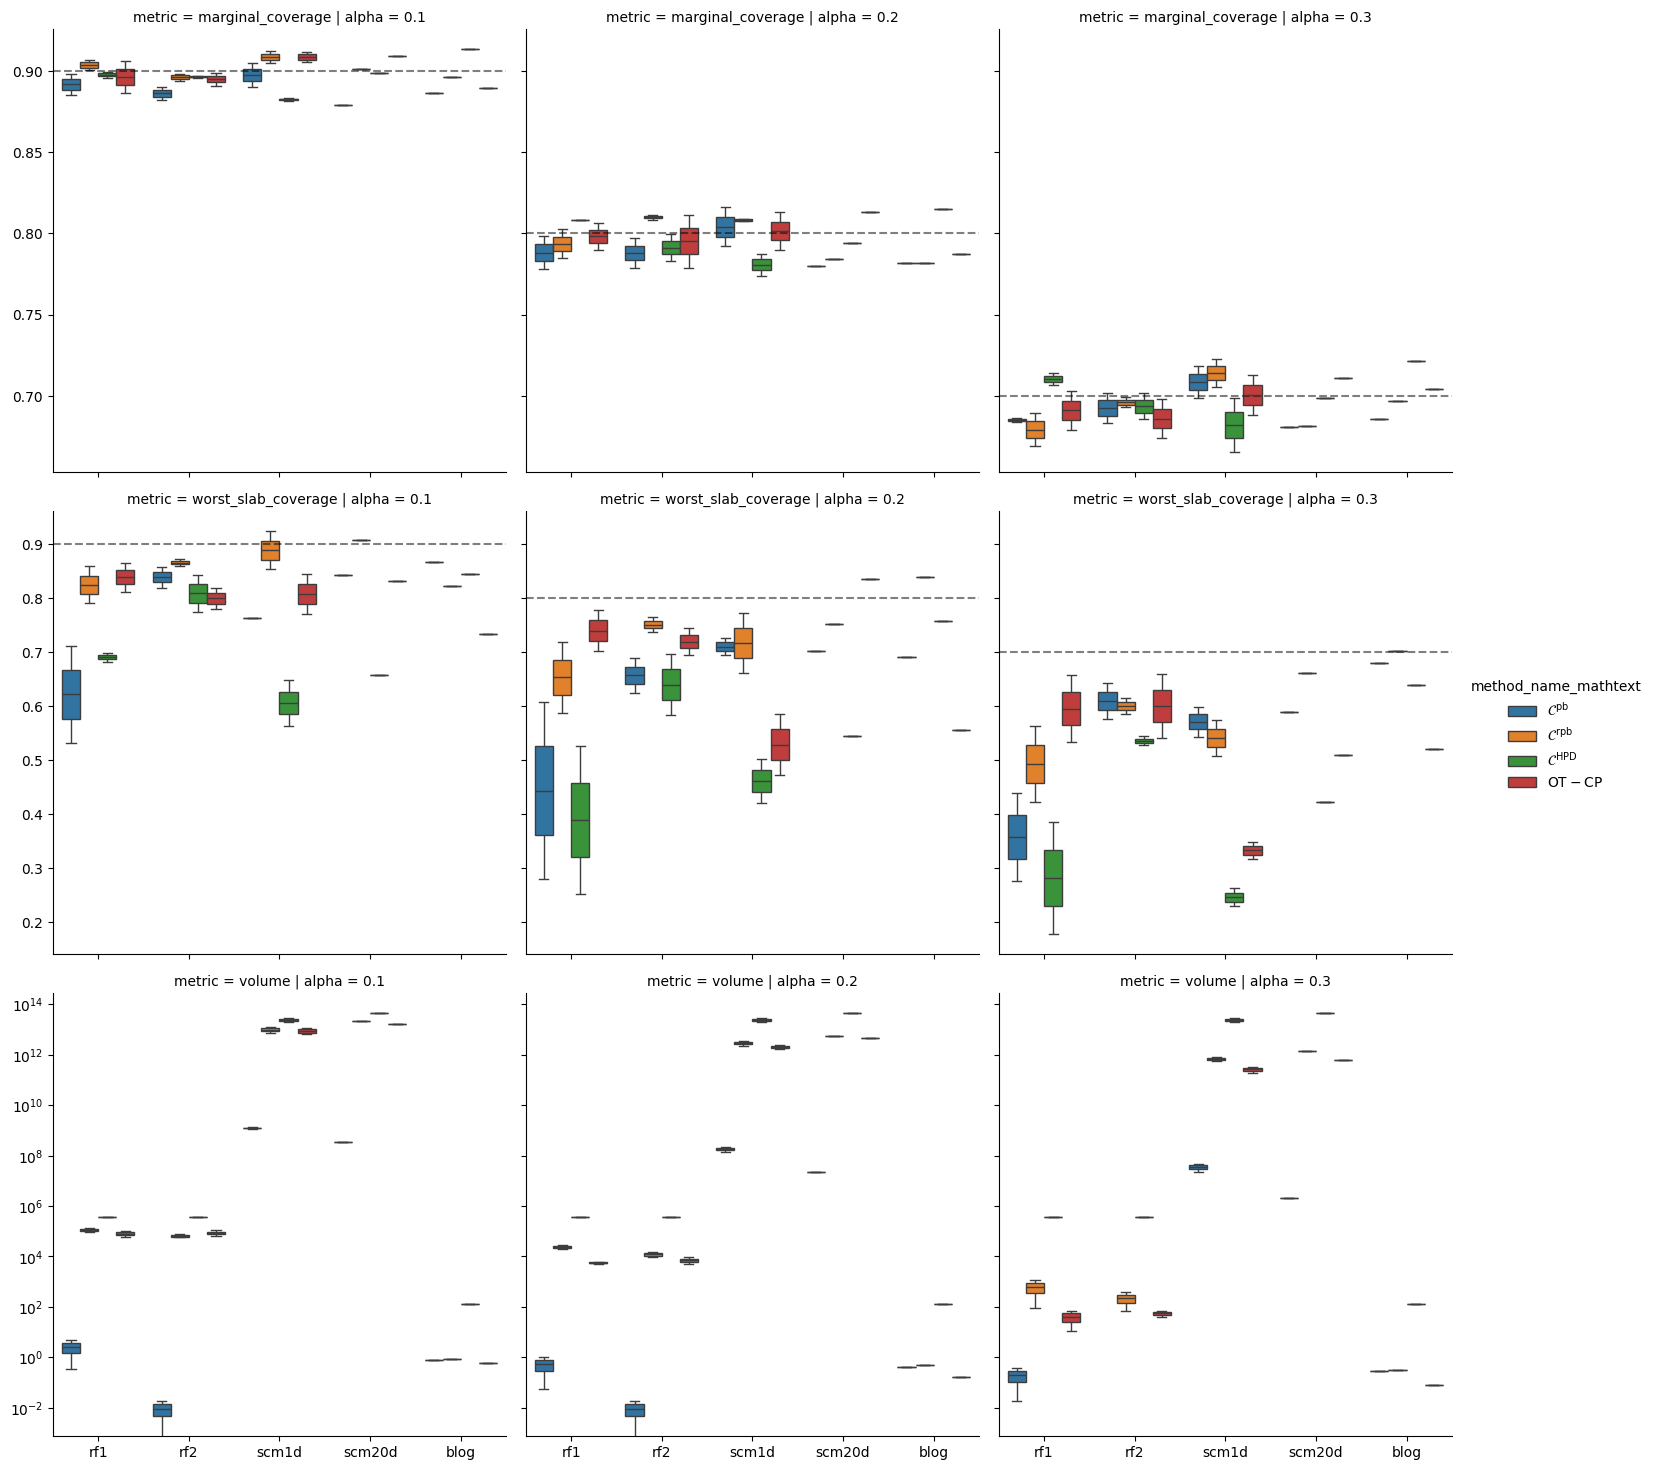

In [43]:
g_all = sns.catplot(
    data=df_melted, kind="box", 
    x="dataset_name", y="value", col="alpha", row="metric", hue="method_name_mathtext",
    sharey="row",
)
g_all.set_axis_labels("", "")
for (metric_name, alpha), ax in g_all.axes_dict.items():
    if metric_name != "volume":
        ax.axhline(1 - alpha, ls="--", c="k", alpha=0.5)
    else:
        ax.set_yscale("log")


In [39]:
g_all.axes_dict

{('marginal_coverage',
  np.float64(0.1)): <Axes: title={'center': 'metric = marginal_coverage | alpha = 0.1'}, ylabel='value'>,
 ('marginal_coverage',
  np.float64(0.2)): <Axes: title={'center': 'metric = marginal_coverage | alpha = 0.2'}>,
 ('marginal_coverage',
  np.float64(0.3)): <Axes: title={'center': 'metric = marginal_coverage | alpha = 0.3'}>,
 ('worst_slab_coverage',
  np.float64(0.1)): <Axes: title={'center': 'metric = worst_slab_coverage | alpha = 0.1'}, ylabel='value'>,
 ('worst_slab_coverage',
  np.float64(0.2)): <Axes: title={'center': 'metric = worst_slab_coverage | alpha = 0.2'}>,
 ('worst_slab_coverage',
  np.float64(0.3)): <Axes: title={'center': 'metric = worst_slab_coverage | alpha = 0.3'}>,
 ('volume',
  np.float64(0.1)): <Axes: title={'center': 'metric = volume | alpha = 0.1'}, xlabel='dataset_name', ylabel='value'>,
 ('volume',
  np.float64(0.2)): <Axes: title={'center': 'metric = volume | alpha = 0.2'}, xlabel='dataset_name'>,
 ('volume',
  np.float64(0.3)): <A